In [2]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load CSV file
data = pd.read_csv("/Users/lilysorensen/Downloads/metadata.csv")

# Initialize a bipartite graph
B = nx.Graph()

# Define nodes and edges based on high incidence municipalities and selected factors
municipalities = ["Villavicencio", "Neiva", "Ibagué", "Cali", 
                  "Sincelejo", "Cúcuta", "Valledupar", 
                  "Bucaramanga", "Yopal", "Cartagena de Indias"]

# Add municipality nodes and their edges to sociodemographic factors
for municipality in municipalities:
    # Add municipality node
    B.add_node(municipality, type="municipality")
    
    # Add edges for each sociodemographic factor with weights
    B.add_edge(municipality, "Water Access", weight=data.loc[data['Municipality'] == municipality, 'Householdswithoutwateraccess(%)'].values[0])
    B.add_edge(municipality, "Housing Density", weight=data.loc[data['Municipality'] == municipality, 'NumberofhousesperKm2'].values[0])
    B.add_edge(municipality, "Education Level", weight=data.loc[data['Municipality'] == municipality, 'Secondary/HigherEducation(%)'].values[0])

# Check nodes and edges to verify
print("Nodes:", B.nodes(data=True))
print("Edges:", B.edges(data=True))


Nodes: [('Villavicencio', {'type': 'municipality'}), ('Water Access', {}), ('Housing Density', {}), ('Education Level', {}), ('Neiva', {'type': 'municipality'}), ('Ibagué', {'type': 'municipality'}), ('Cali', {'type': 'municipality'}), ('Sincelejo', {'type': 'municipality'}), ('Cúcuta', {'type': 'municipality'}), ('Valledupar', {'type': 'municipality'}), ('Bucaramanga', {'type': 'municipality'}), ('Yopal', {'type': 'municipality'}), ('Cartagena de Indias', {'type': 'municipality'})]
Edges: [('Villavicencio', 'Water Access', {'weight': np.float64(5.99)}), ('Villavicencio', 'Housing Density', {'weight': np.float64(111.006093)}), ('Villavicencio', 'Education Level', {'weight': np.float64(62.3)}), ('Water Access', 'Neiva', {'weight': np.float64(2.44)}), ('Water Access', 'Ibagué', {'weight': np.float64(3.08)}), ('Water Access', 'Cali', {'weight': np.float64(0.88)}), ('Water Access', 'Sincelejo', {'weight': np.float64(7.98)}), ('Water Access', 'Cúcuta', {'weight': np.float64(4.1)}), ('Water 

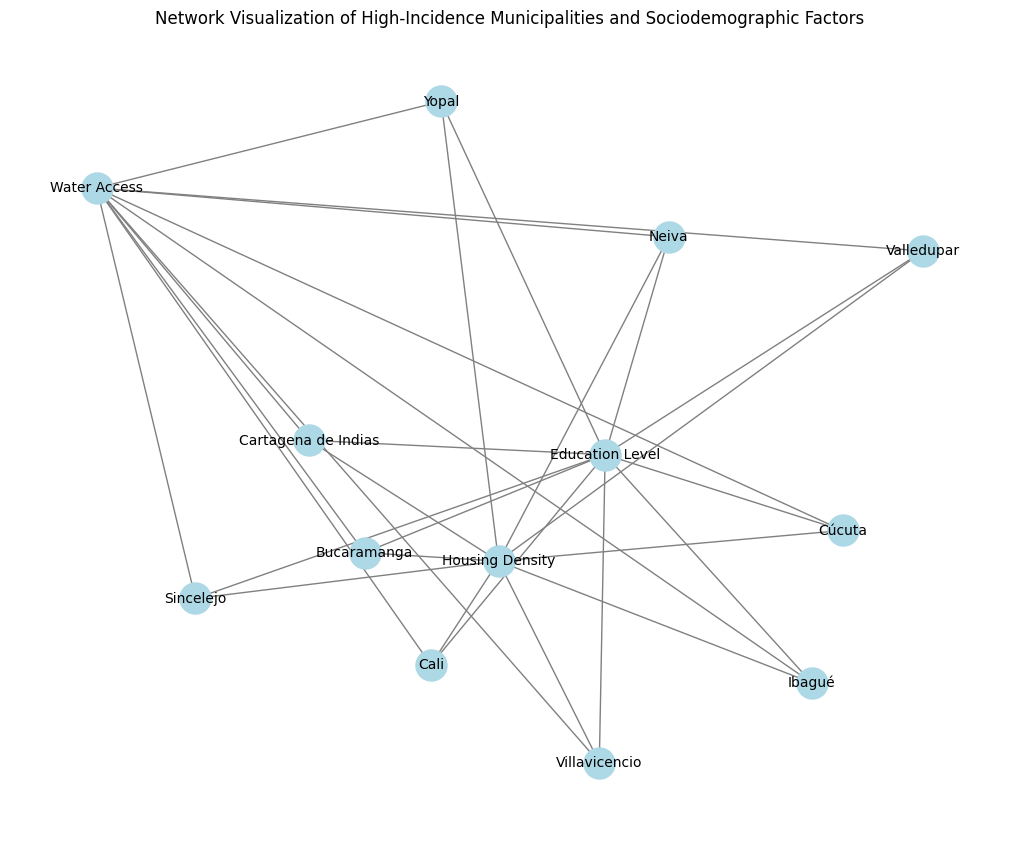

In [3]:
# Set up positions and plot
pos = nx.spring_layout(B, k=0.15)
plt.figure(figsize=(10, 8))
nx.draw(B, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, edge_color="gray")
plt.title("Network Visualization of High-Incidence Municipalities and Sociodemographic Factors")
plt.show()


In [4]:
# Calculate weighted degree centrality
weighted_degree_centrality = nx.degree_centrality(B)
weighted_degree_centrality_weighted = {node: sum(B[node][neighbor]['weight'] for neighbor in B[node]) for node in B}

# Calculate betweenness centrality (use weight)
betweenness_centrality = nx.betweenness_centrality(B, weight='weight')

# Display top 5 nodes by weighted degree centrality and betweenness centrality
top_weighted_degree = sorted(weighted_degree_centrality_weighted.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by Weighted Degree Centrality:", top_weighted_degree)
print("Top 5 nodes by Betweenness Centrality:", top_betweenness)


Top 5 nodes by Weighted Degree Centrality: [('Housing Density', np.float64(3157.4727110000003)), ('Cali', np.float64(1134.3581490000001)), ('Bucaramanga', np.float64(1055.215062)), ('Education Level', np.float64(625.75)), ('Cartagena de Indias', np.float64(423.10544400000003))]
Top 5 nodes by Betweenness Centrality: [('Water Access', 0.8181818181818182), ('Yopal', 0.15151515151515152), ('Cúcuta', 0.030303030303030304), ('Villavicencio', 0.0), ('Housing Density', 0.0)]


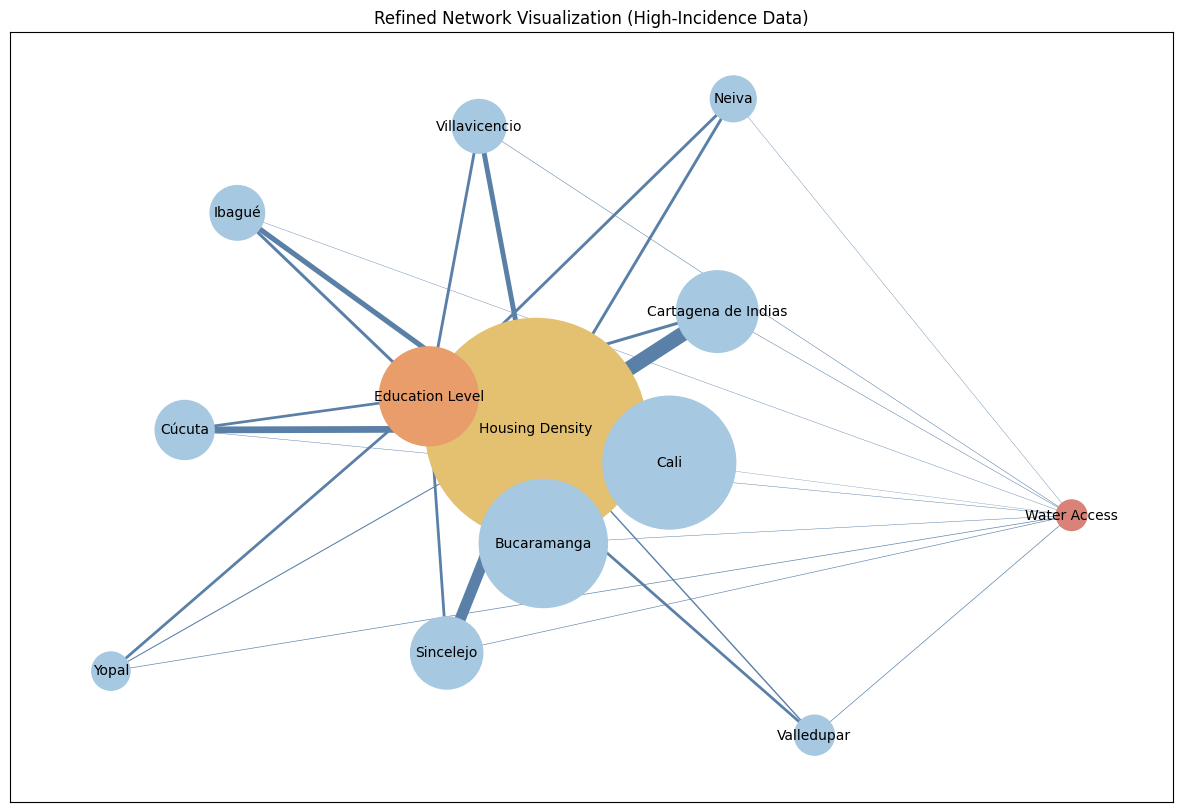

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Define colors based on the new palette
municipality_color = "#A6C8E0"  # Light blue for municipalities
housing_density_color = "#E3C170"  # Yellow for Housing Density
education_level_color = "#E89D6A"  # Orange for Education Level
water_access_color = "#D98378"  # Red for Water Access
edge_color = "#5A80A8"  # Dark blue for edges

# Set up larger figure size
plt.figure(figsize=(15, 10))

# Choose a layout with increased spacing
pos = nx.spring_layout(B, k=2.0, seed=42)  # Higher k for more spread

# Assign colors based on the new scheme
node_colors = []
for node in B.nodes():
    if node == "Water Access":
        node_colors.append(water_access_color)
    elif node == "Housing Density":
        node_colors.append(housing_density_color)
    elif node == "Education Level":
        node_colors.append(education_level_color)
    else:
        node_colors.append(municipality_color)  # Municipalities

# Draw nodes with smaller sizes based on weighted degree centrality
node_sizes = [60 + (weighted_degree_centrality_weighted[node] * 8) for node in B]  # Smaller scaling factor
nx.draw_networkx_nodes(B, pos, node_size=node_sizes, node_color=node_colors, label='Municipalities and Factors')

# Draw edges with the new dark blue color and reduced width scaling
edge_widths = [0.2 + B[u][v]['weight'] * 0.03 for u, v in B.edges()]  # Smaller scaling for edges
nx.draw_networkx_edges(B, pos, width=edge_widths, edge_color=edge_color)  # Set edges to dark blue

# Draw labels
nx.draw_networkx_labels(B, pos, font_size=10, font_color="black")

# Title
plt.title("Refined Network Visualization (High-Incidence Data)")
plt.show()
